# Importing Libraries & Data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

# Understanding the Data

In [3]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
df.shape

(32560, 15)

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

# Understanding Features

<Axes: xlabel='Income', ylabel='count'>

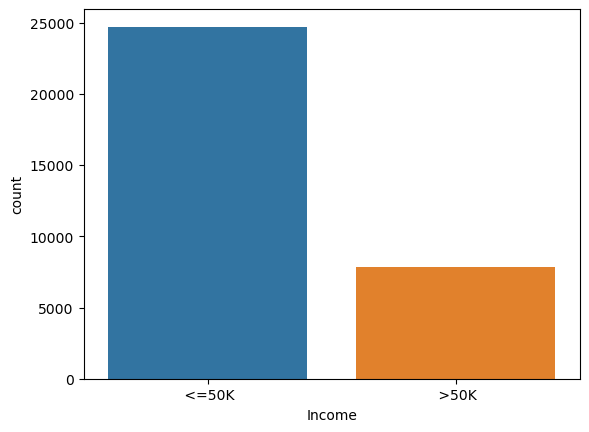

In [10]:
sns.countplot(x='Income', data = df)

<Axes: xlabel='Relationship', ylabel='count'>

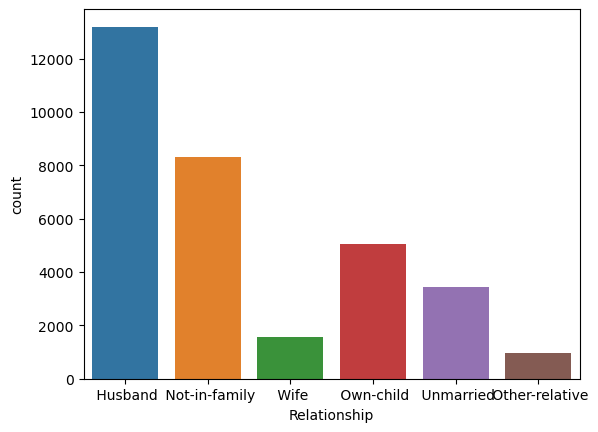

In [11]:
sns.countplot(x='Relationship', data = df)

<Axes: xlabel='Race', ylabel='count'>

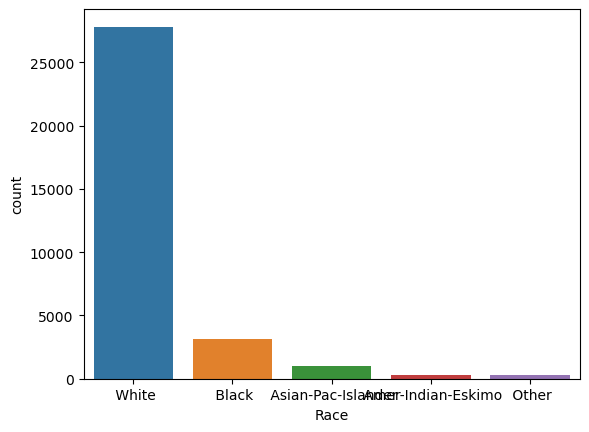

In [13]:
sns.countplot(x='Race', data = df)

<Axes: xlabel='Workclass', ylabel='count'>

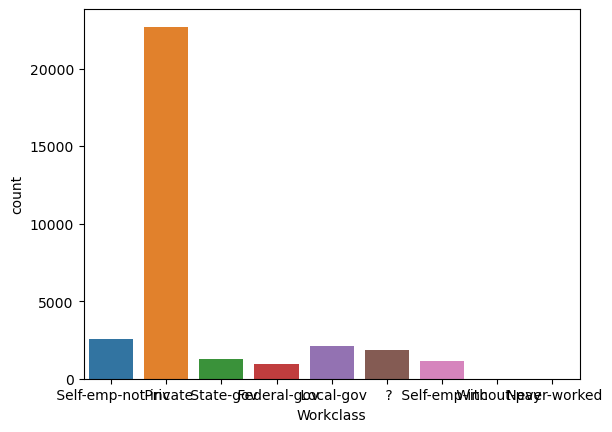

In [14]:
sns.countplot(x='Workclass', data = df)

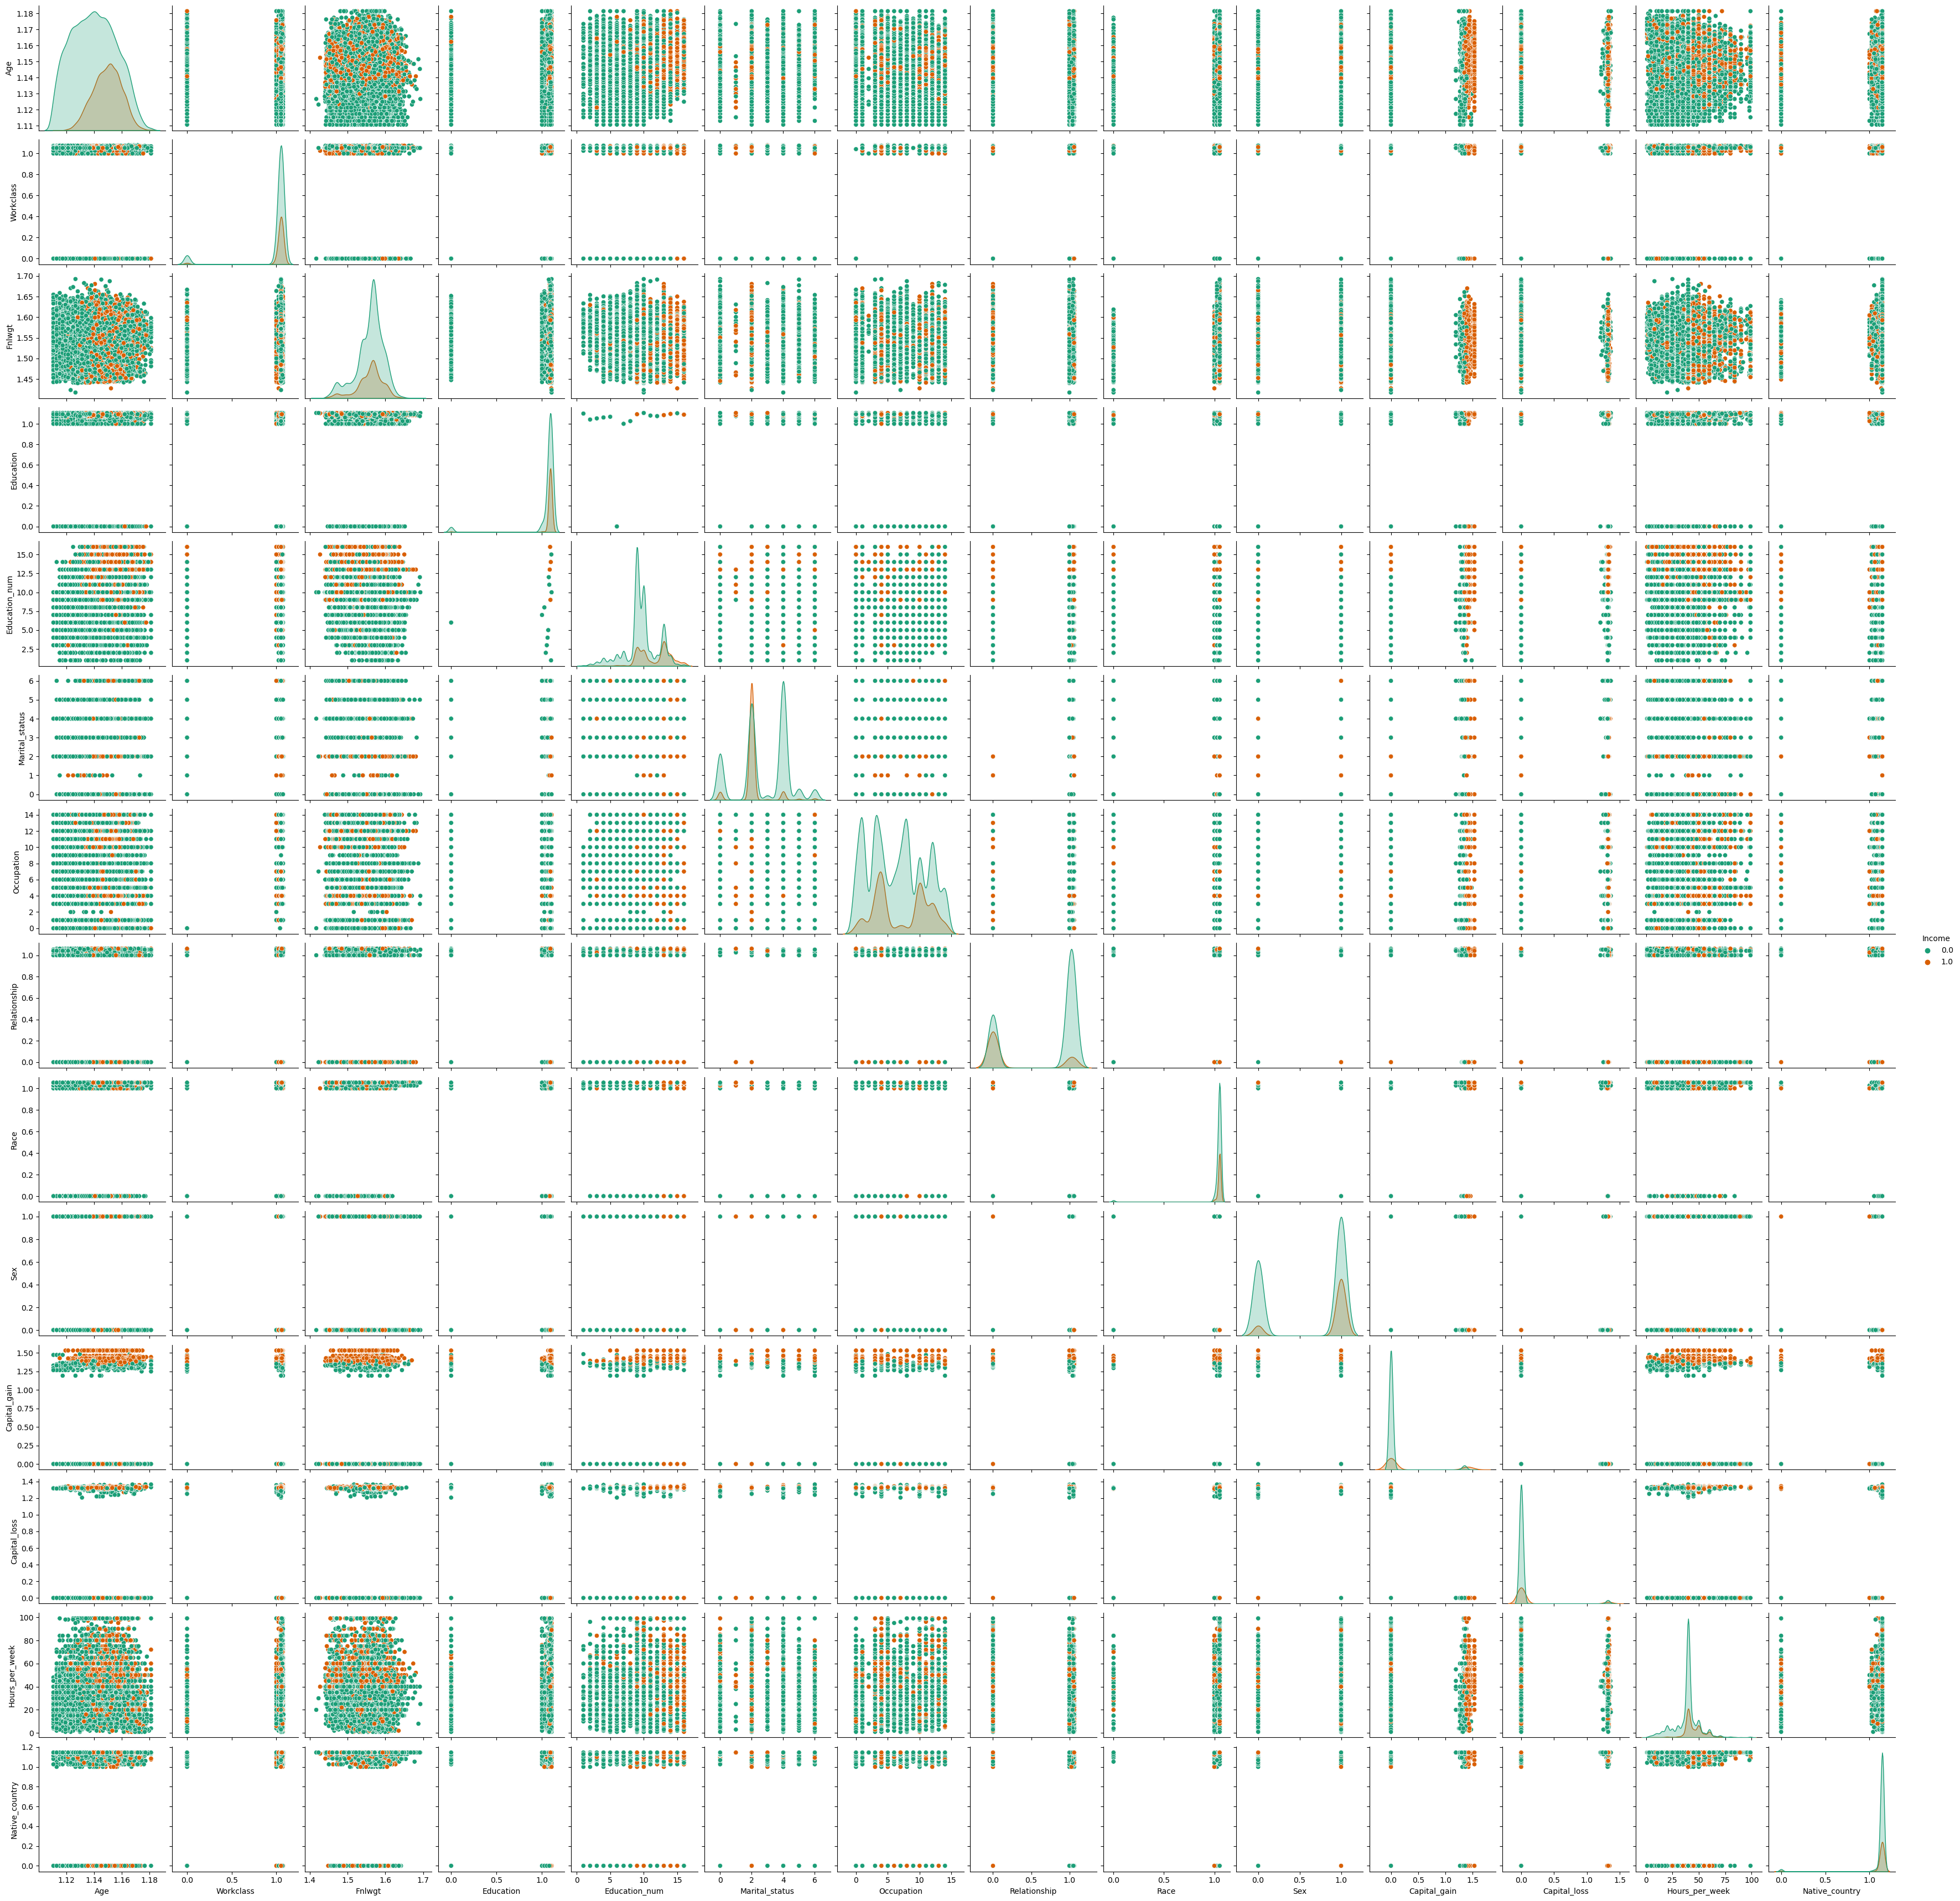

In [36]:
sns.pairplot(df,hue='Income', palette="Dark2")
plt.show()

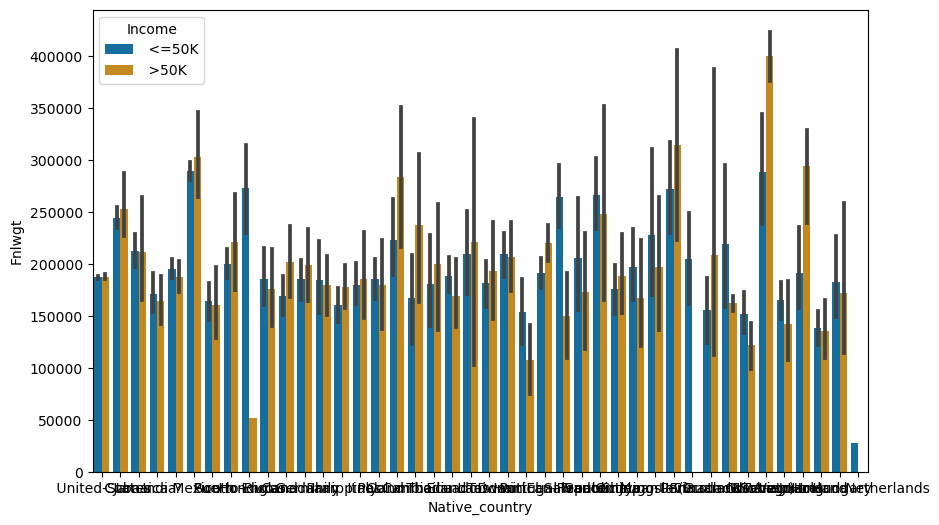

In [22]:
plt.figure(figsize = (10, 6), facecolor = "white")
sns.barplot(x='Native_country',y='Fnlwgt',data=df,palette='colorblind',hue='Income')
plt.show()

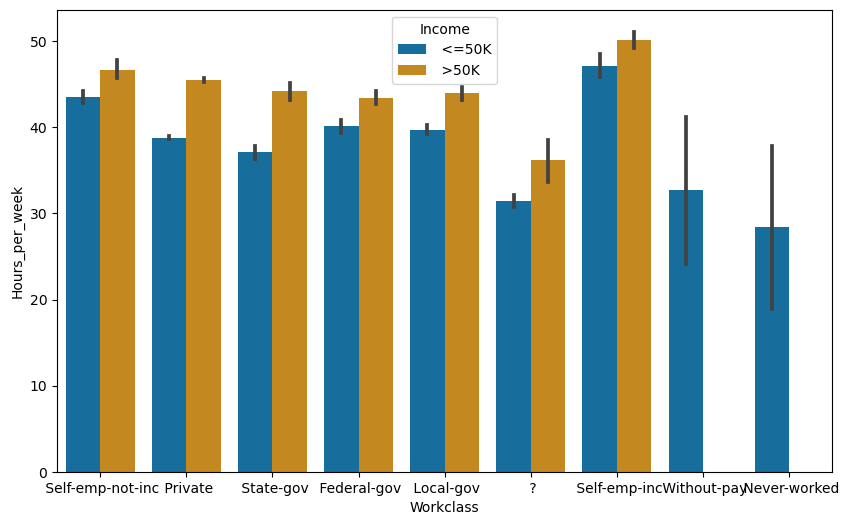

In [24]:
plt.figure(figsize = (10, 6), facecolor = "white")
sns.barplot(x='Workclass',y='Hours_per_week',data=df,palette='colorblind',hue='Income')
plt.show()

# Encoding object data to Integer data

In [25]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50        6.0   83311        9.0             13             2.0   
1       38        4.0  215646       11.0              9             0.0   
2       53        4.0  234721        1.0              7             2.0   
3       28        4.0  338409        9.0             13             2.0   
4       37        4.0  284582       12.0             14             2.0   
...    ...        ...     ...        ...            ...             ...   
32555   27        4.0  257302        7.0             12             2.0   
32556   40        4.0  154374       11.0              9             2.0   
32557   58        4.0  151910       11.0              9             6.0   
32558   22        4.0  201490       11.0              9             4.0   
32559   52        5.0  287927       11.0              9             2.0   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0             4.0           0.0   4.0  1.0             0             0   
1             6.0           1.0   4.0  1.0             0             0   
2             6.0           0.0   2.0  1.0             0             0   
3            10.0           5.0   2.0  0.0             0             0   
4             4.0           5.0   4.0  0.0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555        13.0           5.0   4.0  0.0             0             0   
32556         7.0           0.0   4.0  1.0             0             0   
32557         1.0           4.0   4.0  0.0             0             0   
32558         1.0           3.0   4.0  1.0             0             0   
32559         4.0           5.0   4.0  0.0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13            39.0     0.0  
1                  40            39.0     0.0  
2                  40            39.0     0.0  
3                  40             5.0     0.0  
4                  40            39.0     0.0  
...               ...             ...     ...  
32555              38            39.0     0.0  
32556              40            39.0     1.0  
32557              40            39.0     0.0  
32558              20            39.0     0.0  
32559              40            39.0     1.0  

[32560 rows x 15 columns]

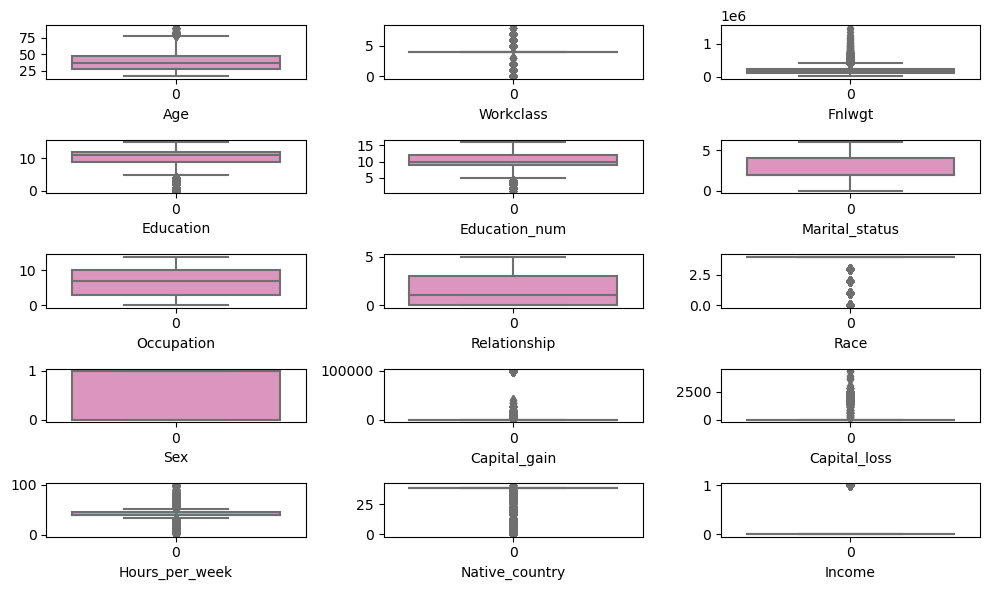

In [26]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 15:
        x=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[c], palette = "Set2_r")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# Correlation Check

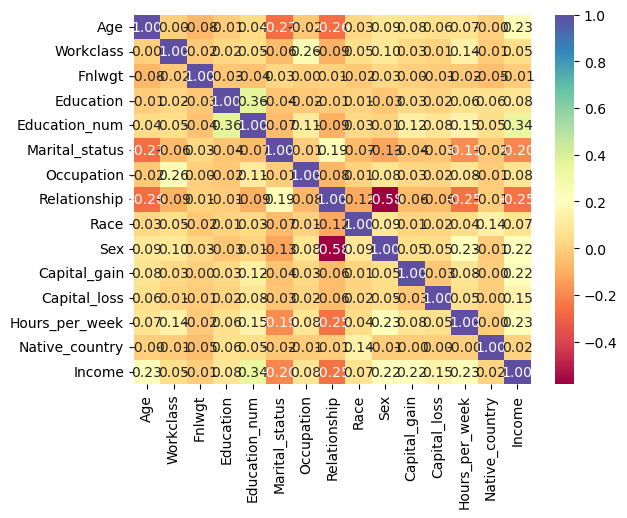

In [27]:
corr = df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',cmap='Spectral')
plt.show()

In [29]:
corr['Income'].sort_values(ascending = False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

# Skewness Check

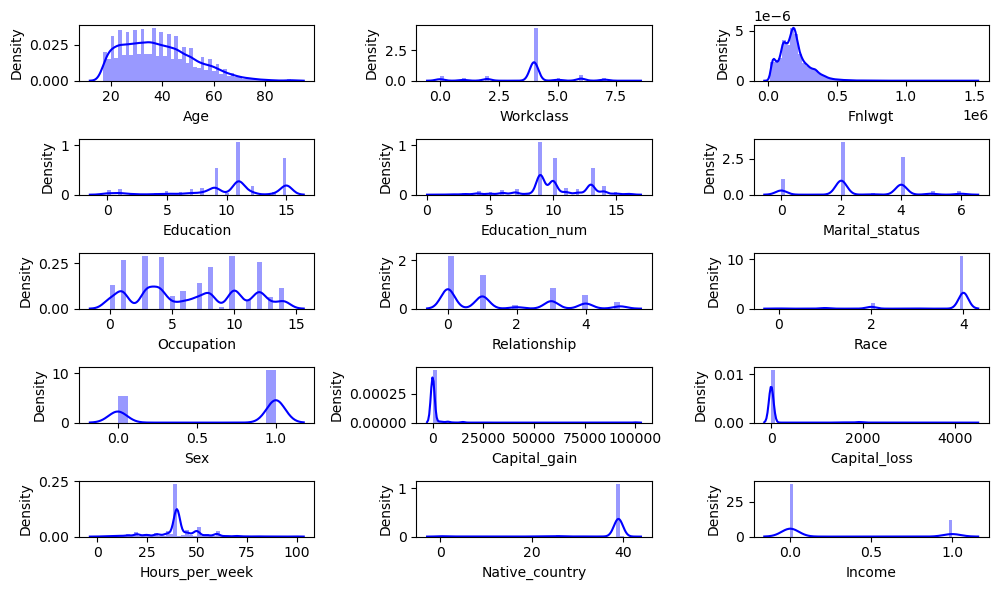

In [30]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for c in df.columns:
    if plotnumber <= 15:
        x=plt.subplot(5,3,plotnumber)
        sns.distplot(df[c],color = "b")
        plt.xlabel(c, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [31]:
skew = df.skew()
skew

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

In [32]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

Age               0.090565
Workclass        -2.923788
Fnlwgt           -0.164177
Education        -2.817690
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship     -0.102451
Race             -4.745983
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Native_country   -5.061925
Income            1.212383
dtype: float64

In [33]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

Age              -0.058338
Workclass        -3.698014
Fnlwgt           -0.618799
Education        -4.833495
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship     -0.349688
Race             -8.651567
Sex              -0.719244
Capital_gain      3.103182
Capital_loss      4.304693
Hours_per_week    0.227636
Native_country   -6.662075
Income            1.212383
dtype: float64

In [34]:
for i,score in skew.iteritems():
    if score > 0.5 or score < -0.5:
        df[i] = np.cbrt(df[i])
df.skew()

Age              -0.107328
Workclass        -3.828170
Fnlwgt           -0.768161
Education        -5.529526
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship     -0.382117
Race             -9.886846
Sex              -0.719244
Capital_gain      3.025657
Capital_loss      4.300148
Hours_per_week    0.227636
Native_country   -7.179662
Income            1.212383
dtype: float64

# Assign feature and target data

In [35]:
x = df.drop('Income', axis =1)
y = df['Income']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Age  Workclass    Fnlwgt  Education  Education_num  \
0      0.894757   0.313317 -1.044972   0.155802       1.134779   
1      0.127378   0.247761  0.467209   0.200092      -0.420027   
2      1.058694   0.247761  0.604579  -0.308210      -1.197429   
3     -0.717410   0.247761  1.202501   0.155802       1.134779   
4      0.053223   0.247761  0.918374   0.219399       1.523480   
...         ...        ...       ...        ...            ...   
32555 -0.817379   0.247761  0.753933   0.100797       0.746077   
32556  0.270212   0.247761 -0.070345   0.200092      -0.420027   
32557  1.313029   0.247761 -0.096054   0.200092      -0.420027   
32558 -1.377825   0.247761  0.357476   0.200092      -0.420027   
32559  1.005064   0.283717  0.937483   0.200092      -0.420027   

       Marital_status  Occupation  Relationship      Race       Sex  \
0           -0.406183   -0.608434     -1.210777  0.140184  0.703087   
1           -1.734026   -0.135480      0.772183  0.140184  0.703087   
2           -0.406183   -0.135480     -1.210777 -0.119755  0.703087   
3           -0.406183    0.810427      0.893978 -0.119755 -1.422298   
4           -0.406183   -0.608434      0.893978  0.140184 -1.422298   
...               ...         ...           ...       ...       ...   
32555       -0.406183    1.519858      0.893978  0.140184 -1.422298   
32556       -0.406183    0.100997     -1.210777  0.140184  0.703087   
32557        2.249503   -1.317864      0.876655  0.140184 -1.422298   
32558        0.921660   -1.317864      0.854532  0.140184  0.703087   
32559       -0.406183   -0.608434      0.893978  0.140184 -1.422298   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  
0         -0.301132     -0.221203       -2.222120        0.155282  
1         -0.301132     -0.221203       -0.035430        0.155282  
2         -0.301132     -0.221203       -0.035430        0.155282  
3         -0.301132     -0.221203       -0.035430       -0.396314  
4         -0.301132     -0.221203       -0.035430        0.155282  
...             ...           ...             ...             ...  
32555     -0.301132     -0.221203       -0.197407        0.155282  
32556     -0.301132     -0.221203       -0.035430        0.155282  
32557     -0.301132     -0.221203       -0.035430        0.155282  
32558     -0.301132     -0.221203       -1.655200        0.155282  
32559      3.421289     -0.221203       -0.035430        0.155282  

[32560 rows x 14 columns]

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values        Features
0     1.244437             Age
1     1.202968       Workclass
2     1.014298          Fnlwgt
3     1.110106       Education
4     1.167975   Education_num
5     1.214396  Marital_status
6     1.186169      Occupation
7     1.883169    Relationship
8     1.010039            Race
9     1.592047             Sex
10    1.043739    Capital_gain
11    1.020095    Capital_loss
12    1.143826  Hours_per_week
13    1.001607  Native_country

In [39]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [41]:
y1.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

# Model Creation

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print(maxAccu," at ",maxRS)

0.9070927723840345  at  19


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRS)

In [44]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [45]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
prfc = RFC.predict(x_test)
print(accuracy_score(y_test,prfc))
print(confusion_matrix(y_test,prfc))
print(classification_report(y_test,prfc))

0.9060814455231931
[[6669  698]
 [ 695 6770]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      7367
         1.0       0.91      0.91      0.91      7465

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832



In [46]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
plr = LR.predict(x_test)
print(accuracy_score(y_test,plr))
print(confusion_matrix(y_test,plr))
print(classification_report(y_test,plr))

0.7984762675296656
[[5758 1609]
 [1380 6085]]
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79      7367
         1.0       0.79      0.82      0.80      7465

    accuracy                           0.80     14832
   macro avg       0.80      0.80      0.80     14832
weighted avg       0.80      0.80      0.80     14832



In [47]:
svc = SVC()
svc.fit(x_train,y_train)
psvc = svc.predict(x_test)
print(accuracy_score(y_test,psvc))
print(confusion_matrix(y_test,psvc))
print(classification_report(y_test,psvc))

0.8289509169363538
[[5622 1745]
 [ 792 6673]]
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82      7367
         1.0       0.79      0.89      0.84      7465

    accuracy                           0.83     14832
   macro avg       0.83      0.83      0.83     14832
weighted avg       0.83      0.83      0.83     14832



In [48]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pgb = GB.predict(x_test)
print(accuracy_score(y_test,pgb))
print(confusion_matrix(y_test,pgb))
print(classification_report(y_test,pgb))

0.8830231930960086
[[6415  952]
 [ 783 6682]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      7367
         1.0       0.88      0.90      0.89      7465

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832



In [49]:
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pab = AB.predict(x_test)
print(accuracy_score(y_test,pab))
print(confusion_matrix(y_test,pab))
print(classification_report(y_test,pab))

0.8625269687162891
[[6272 1095]
 [ 944 6521]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      7367
         1.0       0.86      0.87      0.86      7465

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



In [50]:
B = BaggingClassifier()
B.fit(x_train,y_train)
pb = B.predict(x_test)
print(accuracy_score(y_test,pb))
print(confusion_matrix(y_test,pb))
print(classification_report(y_test,pb))

0.8913160733549083
[[6709  658]
 [ 954 6511]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      7367
         1.0       0.91      0.87      0.89      7465

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



In [51]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pet = ET.predict(x_test)
print(accuracy_score(y_test,pet))
print(confusion_matrix(y_test,pet))
print(classification_report(y_test,pet))

0.9122168284789643
[[6601  766]
 [ 536 6929]]
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      7367
         1.0       0.90      0.93      0.91      7465

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832



In [52]:
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,prfc) - score.mean())

[0.81957929 0.87297735 0.93476942 0.93820168 0.93678568]
0.9004626817831134
Diff b/w Acc score and cross val score : 0.005618763740079746


In [53]:
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,plr) - score.mean())

[0.78671117 0.79318366 0.79227346 0.79336502 0.79134217]
0.7913750952101792
Diff b/w Acc score and cross val score : 0.007101172319486371


In [54]:
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,psvc) - score.mean())

[0.8180623  0.81978155 0.82392799 0.82198847 0.83088905]
0.8229298721180406
Diff b/w Acc score and cross val score : 0.006021044818313226


In [55]:
score = cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pgb) - score.mean())

[0.81158981 0.85821197 0.89350728 0.8958228  0.88894508]
0.8696153876997776
Diff b/w Acc score and cross val score : 0.013407805396230987


In [56]:
score = cross_val_score(AB,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pab) - score.mean())

[0.8072411  0.84294094 0.87135922 0.86821078 0.86780621]
0.8515116508291264
Diff b/w Acc score and cross val score : 0.011015317887162701


In [57]:
score = cross_val_score(B,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pb) - score.mean())

[0.7762945  0.85608819 0.92738673 0.92849196 0.92060281]
0.8817728376774051
Diff b/w Acc score and cross val score : 0.009543235677503148


In [58]:
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Diff b/w Acc score and cross val score :",accuracy_score(y_test,pet) - score.mean())

[0.86154935 0.89067557 0.93244337 0.93375139 0.93405482]
0.9104948989929242
Diff b/w Acc score and cross val score : 0.001721929486040108


# ExtraTreesClassifier is used as the final model as it has the best performance

In [59]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'], 
              'random_state' : [10, 50, 1000], 
              'max_depth' : [0, 10, 20], 
              'n_jobs' : [-2, -1, 1], 
              'n_estimators' : [50, 100, 200, 300],}

In [60]:
GVC = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [61]:
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

# Final Model

In [62]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 50)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

87.53371089536138


In [63]:
import joblib
joblib.dump(Final_model,"Census.pkl")

['Census.pkl']

In [64]:
model = joblib.load("Census.pkl")

prediction = model.predict(x_test)

In [65]:
a = np.array(y_test)
df = pd.DataFrame()
df['predicted'] = prediction
df['Original'] = a
df

predicted  Original
0            1.0       0.0
1            1.0       1.0
2            1.0       1.0
3            1.0       0.0
4            1.0       1.0
...          ...       ...
14827        1.0       1.0
14828        0.0       0.0
14829        1.0       1.0
14830        0.0       0.0
14831        0.0       0.0

[14832 rows x 2 columns]